Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2257 - loss: 2.2057 - val_accuracy: 0.6361 - val_loss: 1.4577
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7373 - loss: 1.2346 - val_accuracy: 0.8444 - val_loss: 0.7300
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.6388 - val_accuracy: 0.9056 - val_loss: 0.3847
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9352 - loss: 0.3106 - val_accuracy: 0.9306 - val_loss: 0.2569
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9488 - loss: 0.2025 - val_accuracy: 0.9472 - val_loss: 0.1914
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.1369 - val_accuracy: 0.9583 - val_loss: 0.1544
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.1138 - val_accuracy: 0.9667 - val_loss: 0.1332
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.0806 - val_accuracy: 0.9694 - val_loss:

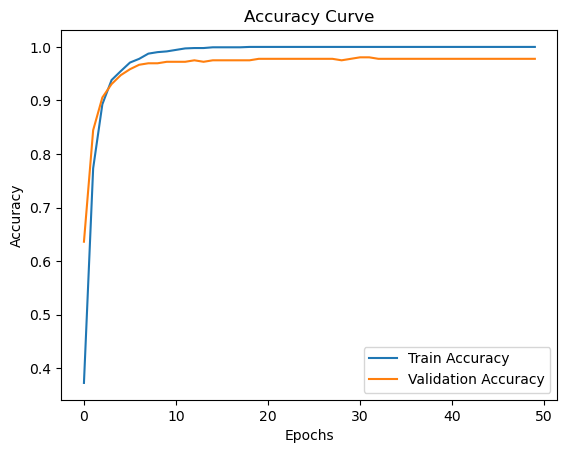

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'index'

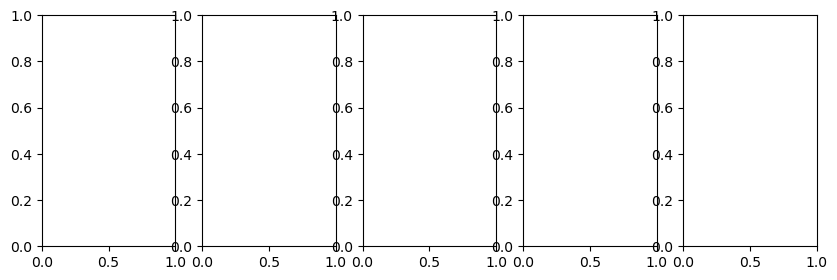

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target  # Features and labels

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Predict on sample images
sample_images = X_test[:5]
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display sample images and predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[y_test.index[i]], cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}')
    ax.axis('off')
plt.show()
